## Importing necessary libraries

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Loading the data

In [5]:
df = pd.read_csv('dataset - v2.csv')
df.head()

,decision_id,label,default,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,brand,carrier,device_name,gms_version,manufacturer,network_type,screen_height,screen_width,screen_dpi
0,94dac214-e5d0-4758-b7ec-5a8e899b7f3e,modeling,0.0,0.0,41247.87,4526.83,0.0,73.0,15231.14,0.0,0.0,0.0,0.0,4583.33,1400.59,0.0,24.00,139.10,33.0,1.57,0.0,0.0,0.0,0.0,0.0,55121.00,800.0,0.0,0.0,0.76,531048.38,0.0,44448.88,0.23,1.04,0.0,0.0,0.0,0.0,6.0,158683.511600,8307.89,0.0,33006.40,0.0,1481.63,0.0,0.0,0.0,0.0,14467.50,0.0,0.0,OPPO,Jio 4G,OPPO CPH1931,21.02.14 (120406-352619232),OPPO,Unknown_0,1456.0,720.0,xhdpi
1,bcab40cd-4aaa-43d2-ae82-7d9ba2ded0a9,modeling,1.0,1.0,10278.99,35633.86,0.0,24.0,55549.52,0.0,0.0,0.0,0.0,1883.33,351.28,0.0,45381.52,2.00,6.0,1.26,0.0,0.0,0.0,0.0,0.0,23985.14,1860.0,0.0,0.0,0.82,83083.14,0.0,10521.63,0.12,1.14,0.0,0.0,0.0,0.0,0.0,2113.802462,28732.51,0.0,48840.27,0.0,401.55,0.0,0.0,0.0,0.0,465.60,0.0,0.0,OPPO,airtel,OPPO CPH1931,20.50.16 (120406-351607135),OPPO,Unknown_0,1456.0,720.0,xhdpi
2,c2f63ac4-e23c-40e7-8ef1-502c1d27df17,modeling,0.0,6.0,4603616.51,46242.48,0.0,354.0,542944.00,0.0,0.0,3.0,0.0,604414.36,30789.99,0.0,23708.39,50000.00,72.0,1.06,0.0,0.0,0.0,0.0,0.0,5634568.27,129495.0,0.0,0.0,NaN,5634568.27,0.0,4603616.51,9.32,0.97,0.0,0.0,0.0,48.0,59.0,776183.615900,276073.22,0.0,633661.62,0.0,153453.88,2.0,86567.0,0.0,0.0,41219.97,0.0,0.0,1cb6aef939f56e90,NaN,D8043bd139f034a8 1cb6aef93a8f1e32,20.36.15 (120400-333172415),d8043bd139f034a8,4G,1423.0,720.0,hdpi
3,dc8c2882-5868-470c-8669-9a7e87782a40,modeling,0.0,0.0,13656.98,15509.49,1.0,33.0,NaN,1.0,0.0,2.0,15000.0,935.67,491.30,0.0,NaN,24158.12,2.0,0.88,0.0,0.0,0.0,0.0,0.0,4043.00,0.0,1.0,0.0,0.20,90107.65,0.0,13075.83,0.18,0.44,0.0,0.0,0.0,0.0,0.0,8577.579649,NaN,0.0,22674.78,0.0,435.86,0.0,0.0,0.0,0.0,4057.50,0.0,0.0,YU,airtel,YU5530,20.45.16 (040408-344294571),YU,4G,1776.0,1080.0,xxhdpi
4,e40e990a-e89c-43c5-b933-f2b096aa1d35,modeling,1.0,7.0,3532898.80,16363.64,0.0,363.0,542944.00,0.0,0.0,3.0,15000.0,405174.44,34803.92,0.0,30000.00,48585.00,73.0,1.87,0.0,0.0,0.0,0.0,0.0,6369117.75,185732.0,1.0,0.0,NaN,6369117.75,0.0,3532898.80,13.96,0.97,0.0,0.0,0.0,62.0,62.0,21332.385090,296151.27,0.0,296151.27,0.0,253644.02,5.0,45058.5,0.0,0.0,40583.69,0.0,0.0,943a681d922e77b,NaN,638b5f4f86dfed5d 943a681d9bc971d,20.36.15 (100300-333172415),638b5f4f86dfed5d,Wifi,1920.0,1080.0,xhdpi


In [4]:
#filtering the data for our use case: label == 'modeling'
#checking the distinct values for the column
df.label.value_counts()

modeling    4661
oot         1585
Name: label, dtype: int64

In [5]:
df = df[df['label']=='modeling']
df.label.count()

4661

## EDA - Priliminary

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4661 entries, 0 to 4660
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   decision_id    4661 non-null   object 
 1   label          4661 non-null   object 
 2   default        4661 non-null   float64
 3   v1             3724 non-null   float64
 4   v2             4509 non-null   float64
 5   v3             4501 non-null   float64
 6   v4             4444 non-null   float64
 7   v5             4509 non-null   float64
 8   v6             4260 non-null   float64
 9   v7             4444 non-null   float64
 10  v8             4397 non-null   float64
 11  v9             4444 non-null   float64
 12  v10            4173 non-null   float64
 13  v11            4509 non-null   float64
 14  v12            4508 non-null   float64
 15  v13            4444 non-null   float64
 16  v14            4440 non-null   float64
 17  v15            4509 non-null   float64
 18  v16     

In [15]:
df.isnull().sum()

decision_id         0
label               0
default          1585
v1               1200
v2                238
v3                247
v4                314
v5                238
v6                628
v7                314
v8                378
v9                314
v10               637
v11               238
v12               239
v13               314
v14               330
v15               238
v16               238
v17               328
v18               637
v19               637
v20               238
v21               637
v22               238
v23               238
v24               637
v25               637
v26               238
v27              1995
v28               238
v29               314
v30               238
v31               238
v32               338
v33               887
v34               637
v35               637
v36               238
v37               238
v38               972
v39               636
v40               238
v41               247
v42               637
v43       

In [205]:
df.describe()

,default,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,screen_height,screen_width
count,4661.000000,3724.000000,4.509000e+03,4.501000e+03,4444.000000,4509.000000,4.260000e+03,4444.000000,4397.000000,4444.000000,4.173000e+03,4509.000000,4508.000000,4444.000000,4.440000e+03,4.509000e+03,4509.000000,4438.000000,4173.000000,4173.000000,4509.000000,4173.000000,4509.000000,4.509000e+03,4.173000e+03,4173.000000,4509.000000,3168.000000,4.509000e+03,4444.000000,4.509000e+03,4509.000000,4432.000000,4009.000000,4173.000000,4173.000000,4509.000000,4509.000000,3.925000e+03,4.253000e+03,4509.00000,4.501000e+03,4173.000000,4.509000e+03,3724.000000,3724.000000,3975.000000,4509.000000,4.071000e+03,4021.000000,4173.000000,4429.000000,4429.000000
mean,0.225059,1.669173,2.909331e+05,2.212780e+04,0.143114,110.685740,1.377162e+05,0.252250,10.702524,1.606661,3.682758e+04,29505.525851,3944.227755,0.451395,8.919758e+03,2.950963e+04,12.211133,1.279126,0.085071,0.101126,0.004657,0.018212,0.011532,6.422409e+05,3.133523e+04,0.731608,0.030384,134.379107,7.930538e+05,0.059631,2.855259e+05,1.496769,11.668005,25.779995,0.073089,0.036904,3.468175,5.586161,7.101773e+04,1.002173e+05,0.04613,9.859835e+04,0.082914,1.349202e+04,0.547261,4861.377223,84.428050,0.016190,1.115641e+04,35.289659,0.025881,1775.886430,915.904493
std,0.417666,2.758058,9.781419e+05,7.684439e+04,0.527220,97.780384,9.326519e+05,0.535111,166.728136,2.189042,2.460079e+05,87195.053628,16072.299415,1.064698,4.310565e+04,6.937606e+04,18.355161,0.735059,0.279020,0.658182,0.087990,0.194985,0.159997,2.869873e+06,1.314517e+05,2.637376,0.191221,3223.536037,3.036961e+06,0.317257,9.574121e+05,2.552048,385.150349,235.063869,0.260314,0.286445,12.521009,15.764416,2.284996e+05,5.361089e+05,0.30683,3.449636e+05,0.463767,4.713678e+04,1.344769,17596.702471,1407.818208,0.133063,9.675970e+04,410.895820,0.238446,393.375076,193.117649
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,2.000000e+00,0.000000,-308.000000,0.000000,-1.000000e+05,0.000000,0.000000,0.000000,0.000000e+00,-6.612900e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-6.004179e+05,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.917522e+01,3.050000e+00,0.00000,1.900000e-01,0.000000,0.000000e+00,0.000000,-70569.500000,-221.000000,0.000000,1.000000e-01,0.000000,0.000000,720.000000,480.000000
25%,0.000000,0.000000,1.843551e+04,1.119820e+03,0.000000,40.000000,1.877210e+04,0.000000,0.000000,1.000000,0.000000e+00,803.330000,515.985000,0.000000,3.800000e+01,1.068000e+03,1.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,6.626853e+04,0.000000e+00,0.000000,0.000000,0.807500,1.114552e+05,0.000000,1.736879e+04,0.230000,0.930000,0.000000,0.000000,0.000000,0.000000,0.000000,1.688944e+03,1.146485e+04,0.00000,2.062468e+04,0.000000,6.342200e+02,0.000000,0.000000,0.000000,0.000000,2.051370e+03,0.000000,0.000000,1407.000000,720.000000
50%,0.000000,1.000000,5.235400e+04,5.608190e+03,0.000000,85.000000,4.131452e+04,0.000000,0.000000,1.000000,0.000000e+00,5282.930000,1254.560000,0.000000,4.229250e+02,7.425650e+03,5.000000,1.230000,0.000000,0.000000,0.000000,0.000000,0.000000,1.767246e+05,4.775000e+03,0.000000,0.000000,2.070000,2.648879e+05,0.000000,4.945639e+04,0.650000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,4.873562e+03,2.634551e+04,0.00000,4.208334e+04,0.000000,1.811300e+03,0.000000,0.000000,0.000000,0.000000,4.455830e+03,0.000000,0.000000,1920.000000,1080.000000
75%,0.000000,2.000000,1.510065e+05,1.644696e+04,0.000000,153.000000,1.003947e+05,0.000000,0.000000,2.000000,5.500000e+03,16637.610000,2930.872500,1.000000,3.105602e+03,2.605900e+04,17.000000,1.800000,0.000000,0.000000,0.000000,0.000000,0.000000,4.369201e+05,2.330100e+04,1.000000,0.000000,6.982500,6.227707e+05,0.000

In [207]:
df[df['default']==0].describe()

,default,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,screen_height,screen_width
count,3612.0,2828.000000,3.481000e+03,3.474000e+03,3422.000000,3481.000000,3.297000e+03,3422.000000,3382.000000,3422.000000,3.189000e+03,3481.000000,3480.000000,3422.000000,3.421000e+03,3.481000e+03,3481.000000,3425.00000,3189.000000,3189.000000,3481.000000,3189.000000,3481.000000,3.481000e+03,3.189000e+03,3189.000000,3481.000000,2555.000000,3.481000e+03,3422.000000,3.481000e+03,3481.000000,3418.000000,3069.000000,3189.000000,3189.000000,3481.000000,3481.000000,3.089000e+03,3.293000e+03,3481.000000,3.474000e+03,3189.000000,3.481000e+03,2828.000000,2828.000000,3048.000000,3481.000000,3.152000e+03,3078.000000,3189.000000,3489.000000,3489.000000
mean,0.0,1.450495,2.123397e+05,2.202118e+04,0.157218,106.643493,1.273823e+05,0.259790,12.795387,1.638515,3.777481e+04,19873.094680,3525.999784,0.451490,8.849243e+03,2.590766e+04,11.296754,1.26360,0.089997,0.102540,0.005458,0.016306,0.012353,5.550820e+05,3.003808e+04,0.739103,0.034186,160.954896,7.273868e+05,0.066043,2.059286e+05,1.226828,14.083596,30.616162,0.077454,0.038257,2.427751,4.680552,5.382153e+04,9.143974e+04,0.046826,9.212754e+04,0.081844,9.497312e+03,0.427511,3418.305244,91.842520,0.017811,1.099185e+04,41.701501,0.024459,1788.789051,922.579822
std,0.0,2.660754,8.830224e+05,8.342482e+04,0.555438,94.471285,1.053371e+06,0.536329,181.106536,2.244083,2.638687e+05,62961.448097,17579.012413,1.090932,4.634629e+04,7.099323e+04,17.407130,0.73794,0.286222,0.722785,0.097226,0.186724,0.174913,3.130340e+06,1.453429e+05,2.806211,0.202663,3588.480589,3.331543e+06,0.330233,8.524542e+05,2.000179,438.025308,260.007657,0.267352,0.291737,10.566593,15.010598,2.043325e+05,5.915029e+05,0.301989,3.815960e+05,0.490064,4.094823e+04,1.222959,15884.188672,1454.446359,0.138647,1.094368e+05,462.604097,0.230985,397.187601,194.481188
min,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,2.000000e+00,0.000000,-308.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,-6.612900e+04,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-6.004179e+05,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.917522e+01,3.050000e+00,0.000000,1.900000e-01,0.000000,0.000000e+00,0.000000,0.000000,-221.000000,0.000000,1.000000e-01,0.000000,0.000000,720.000000,480.000000
25%,0.0,0.000000,1.783657e+04,1.150530e+03,0.000000,38.000000,1.817247e+04,0.000000,0.000000,1.000000,0.000000e+00,815.650000,511.932500,0.000000,3.669000e+01,1.043000e+03,1.000000,0.73000,0.000000,0.000000,0.000000,0.000000,0.000000,6.415372e+04,0.000000e+00,0.000000,0.000000,0.780000,1.107782e+05,0.000000,1.720998e+04,0.220000,0.950000,0.000000,0.000000,0.000000,0.000000,0.000000,1.598464e+03,1.118981e+04,0.000000,2.019105e+04,0.000000,6.222100e+02,0.000000,0.000000,0.000000,0.000000,1.963545e+03,0.000000,0.000000,1407.000000,720.000000
50%,0.0,1.000000,4.787954e+04,5.262720e+03,0.000000,83.000000,3.787638e+04,0.000000,0.000000,1.000000,0.000000e+00,5065.850000,1207.720000,0.000000,3.685100e+02,6.334000e+03,5.000000,1.20000,0.000000,0.000000,0.000000,0.000000,0.000000,1.661920e+05,3.587000e+03,0.000000,0.000000,1.910000,2.603192e+05,0.000000,4.514639e+04,0.600000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,4.127564e+03,2.452101e+04,0.000000,3.938505e+04,0.000000,1.656320e+03,0.000000,0.000000,0.000000,0.000000,4.244525e+03,0.000000,0.000000,1920.000000,1080.000000
75%,0.0,2.000000,1.318410e+05,1.541183e+04,0.000000,148.000000,8.454171e+04,0.000000,0.000000,2.000000,5.218000e+03,14166.670000,2694.772500,1.000000,3.008640e+03,2.183100e+04,15.000000,1.78000,0.000000,0.000000,0.000000,0.000000,0.000000,3.899284e+05,2.052500e+04,1.000000,0.000000,6.200000,5.669829e+05,0.000000,1.279815e+05,1.450000,1.270000,0.00000

In [208]:
df[df['default']==1].describe()

,default,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,screen_height,screen_width
count,1049.0,896.000000,1.028000e+03,1027.000000,1022.000000,1028.000000,9.630000e+02,1022.000000,1015.000000,1022.000000,9.840000e+02,1028.000000,1028.000000,1022.000000,1019.000000,1028.000000,1028.000000,1013.000000,984.000000,984.000000,1028.000000,984.000000,1028.000000,1.028000e+03,984.000000,984.000000,1028.000000,613.000000,1.028000e+03,1022.000000,1.028000e+03,1028.000000,1014.000000,940.000000,984.000000,984.000000,1028.000000,1028.000000,8.360000e+02,9.600000e+02,1028.000000,1027.000000,984.000000,1028.000000,896.000000,896.000000,927.000000,1028.000000,919.000000,943.000000,984.000000,940.000000,940.000000
mean,1.0,2.359375,5.570652e+05,22488.469601,0.095890,124.373541,1.730961e+05,0.227006,3.729064,1.500000,3.375771e+04,62122.736848,5360.018940,0.451076,9156.489882,41706.561518,15.307393,1.331619,0.069106,0.096545,0.001946,0.024390,0.008755,9.373769e+05,35539.115305,0.707317,0.017510,23.610522,1.015415e+06,0.038160,5.550573e+05,2.410837,3.525513,9.990426,0.058943,0.032520,6.991245,8.652724,1.345573e+05,1.303262e+05,0.043774,120486.955375,0.086382,27018.840146,0.925223,9416.073158,60.049083,0.010700,11720.792057,14.361082,0.030488,1727.995745,891.127660
std,0.0,2.941569,1.210677e+06,48380.803684,0.415897,107.159195,2.183873e+05,0.530495,105.292204,1.991043,1.761662e+05,136239.485560,9176.785917,0.972216,29765.495403,62093.830624,20.968861,0.723129,0.253763,0.379843,0.044087,0.219624,0.093202,1.683895e+06,69311.478328,1.995342,0.145309,135.309896,1.676609e+06,0.268328,1.211205e+06,3.734796,39.794280,120.995969,0.235638,0.268675,17.138673,17.753177,2.929552e+05,2.685539e+05,0.322826,168526.155717,0.365970,61918.785606,1.615563,21534.804463,1242.642301,0.111998,19996.410419,144.586603,0.261238,375.230982,185.986145
min,1.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.800000e+01,0.000000,0.000000,0.000000,-1.000000e+05,0.000000,0.000000,0.000000,0.000000,-18539.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-461203.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064383e+02,9.470000e+00,0.000000,90.720000,0.000000,0.000000,0.000000,-70569.500000,0.000000,0.000000,1.000000,0.000000,0.000000,854.000000,480.000000
25%,1.0,0.000000,2.027642e+04,991.410000,0.000000,47.000000,2.134410e+04,0.000000,0.000000,0.000000,0.000000e+00,803.330000,530.780000,0.000000,48.205000,1362.000000,0.000000,0.830000,0.000000,0.000000,0.000000,0.000000,0.000000,7.518645e+04,115.000000,0.000000,0.000000,0.990000,1.163408e+05,0.000000,1.902661e+04,0.260000,0.890000,0.000000,0.000000,0.000000,0.000000,0.000000,2.419693e+03,1.327751e+04,0.000000,23008.485000,0.000000,663.340000,0.000000,0.000000,0.000000,0.000000,2520.820000,0.000000,0.000000,1407.000000,720.000000
50%,1.0,1.000000,7.998496e+04,6502.950000,0.000000,88.000000,6.888400e+04,0.000000,0.000000,1.000000,0.000000e+00,6663.175000,1435.980000,0.000000,555.490000,13691.620000,6.000000,1.360000,0.000000,0.000000,0.000000,0.000000,0.000000,2.225945e+05,7426.000000,0.000000,0.000000,2.870000,2.962359e+05,0.000000,7.698573e+04,0.895000,0.990000,0.000000,0.000000,0.000000,0.000000,0.000000,1.162584e+04,3.824002e+04,0.000000,51692.530000,0.000000,3127.940000,0.000000,0.000000,0.000000,0.000000,5346.580000,0.000000,0.000000,1520.000000,720.000000
75%,1.0,4.000000,3.053422e+05,18276.515000,0.000000,169.250000,2.595493e+05,0.000000,0.000000,2.000000,6.122000e+03,33748.627500,4906.560000,1.000000,4468.000000,52142.810000,19.000000,1.870000,0.000000,0.000000,0.000000,0.000000,0.000000,8.151079e+05,28275.000000,1.000000,0.000000,10.370000,9.089579e+05,0.000000,2.995529e+05,2.442500,1.170000,0.000000,0.000000,0.000000,1.000000,5.000000,9.086329e+04,1.920380

### Initially from the data itself, it can be assumed that information related to cellular phone might not have an impact to default. From looking at data description separately as well, we can notice that the distributions are similar and hence columns like screen_height, screen_width will not be relevant for predicting default.

### Checking for distribution of some random variables (continuous) separated by default to understand if the information present in these columns will help the model to predict well.

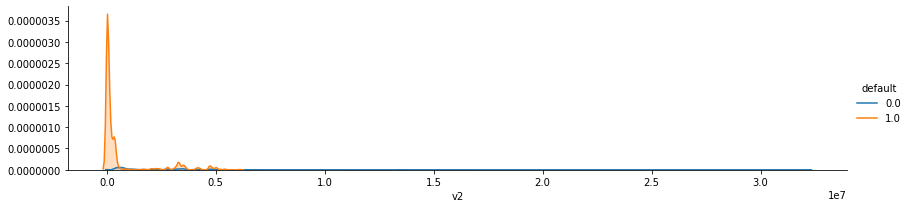

In [221]:
#v2 refers to avg monthly credit transactions in last 180 days (6 months)
# Two possibilities for it
# Higher the 
facet = sns.FacetGrid(df, hue="default",aspect=4 )
facet.map(sns.kdeplot, 'v2', shade = True)
facet.add_legend()
plt.show()

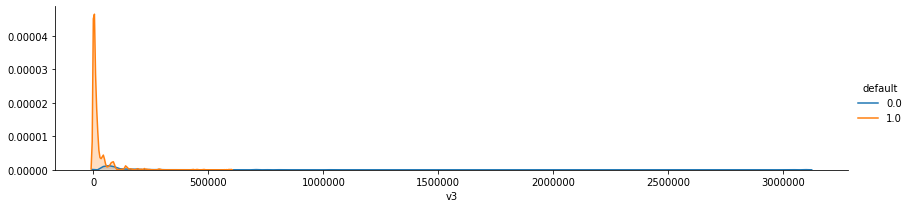

In [222]:
# v3 refers to minimum balance avg per month for 12 months
# this can be a good feature for modeling activity as having less balance might indicate a higher default
# this is also justified by the graph below, most of the defaulters are having lower value of v2
# due to which they are unable to pay off their debt by the said date
facet = sns.FacetGrid(df, hue="default",aspect=4 )
facet.map(sns.kdeplot, 'v3', shade = True)
facet.add_legend()
plt.show()

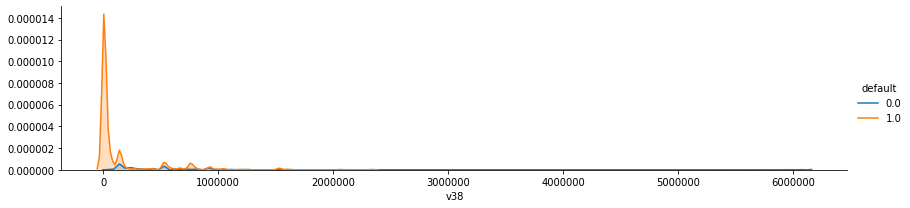

In [218]:
# distance from pin code - Why this can be imp? Sometimes pin code also justifies income of people and based on that the rate of default
#can be more or less
facet = sns.FacetGrid(df, hue="default",aspect=4 )
facet.map(sns.kdeplot, 'v38', shade = True)
facet.add_legend()
plt.show()

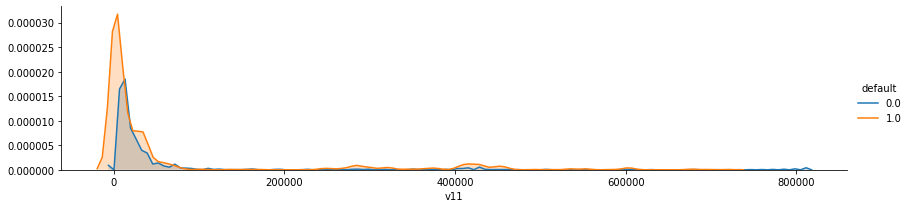

In [219]:
#v11 - stands for avg monthly debit card transactions for the last 180 days
facet = sns.FacetGrid(df, hue="default",aspect=4 )
facet.map(sns.kdeplot, 'v11', shade = True)
facet.add_legend()
plt.show()

### Checking for some categorical columns

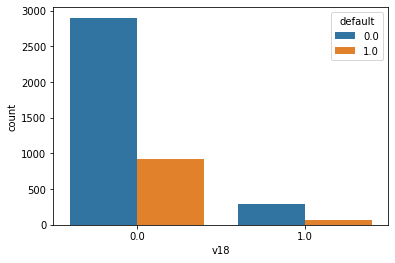

In [234]:
#From this we can observe that if someone has an existing loan, and they are repaying it, the chances of default
# is lesser compared to ones who do not have loan.
# However, that needs to be further validated as it is just the counts and the distributions can be misleading.
sns.countplot(x="v18", 
                   data=df, 
                   hue='default') 

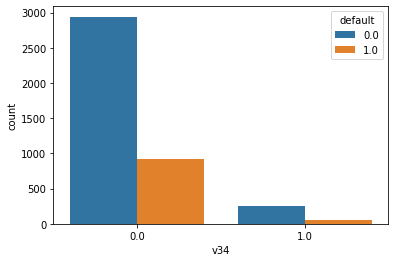

In [235]:
sns.countplot(x="v34", 
                   data=df, 
                   hue='default') 

In [79]:
print(df['v18'].value_counts())
print(df['v34'].value_counts())

0.0    3818
1.0     355
Name: v18, dtype: int64
0.0    3868
1.0     305
Name: v34, dtype: int64


#### Both the categorical columns are having similar distribution, thus we might later go forward with just one variable if they come to be of importance. From the counts we can see that people with existing loans have lower tendency to default. But this also can be misleading as it is just the count

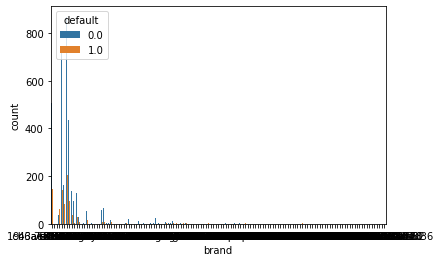

In [236]:
sns.countplot(x="brand", 
                   data=df, 
                   hue='default') 

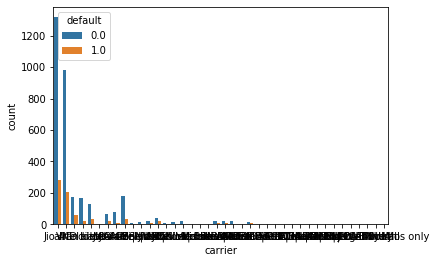

In [237]:
sns.countplot(x="carrier", 
                   data=df, 
                   hue='default') 

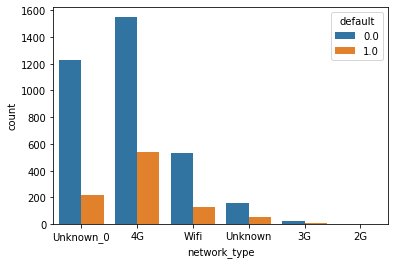

In [239]:
sns.countplot(x="network_type", 
                   data=df, 
                   hue='default') 

### Observations from EDA 
### 1. Numerical variables like v2, v3, v38, v11 etc has a different distribution per category of default (1 or 0). This might be helpful for the model to find patterns. Also, based on their description, these variables along with some others can come out to be important.
### 2. Numerical features related to cellular phone have similar distribution for both 1 or 0 category of default. Hence these variables can be dropped.
### 3. Categorical features related to cellular phones might be showing some pattern. However, based on understanding, these might just be a correlation and not a causation of a person defaulting. For example, a person with a particular network_type or carrier might not be having higher propensity towards defaulting. Thus, we will go ahead with dropping these features as they might add noise to the data.
### 4. Numerical feature v3 indicates month end balance of a customer for 12 months, this might be a very relevant feature for the model based on the distribution as well as business understanding of the fact that a person with a higher average balance might be able to repay off their debt well on time.
### 5. For feature v38, which indicates distance from pin code, there can be assumptions such as, certain locations may be off city limits and thus incomes can be comparatively lesser for people thereby having a higher probability of default.

## Preprocessing Stage

In [124]:
class preprocessing:
    
    def __init__(self, df, target_var, additional_cols_required, cols_to_drop, threshold_for_category):
        self.df = df
        self.target_var = target_var
        self.additional_cols_required = additional_cols_required
        self.cols_to_drop = cols_to_drop
        self.threshold = threshold_for_category
        self.categorical_features = []
    
    #defining deduplication method
    def dedup(self):
        if self.df.duplicated().sum() == 0:
            self.df = self.df
        else:
            self.df = self.df.drop_duplicates(keep = 'last')
            
    #getting the list of categorical features for one hot encoding
    
    def list_categorical(self, df):
        for col in df.columns:
            if df[col].nunique() < self.threshold:
                self.categorical_features.append(col)
                
    #imputation for columns with null values
    #The two categorical columns v18 and v34 does not have any empty values
    #For the remaining numerical columns, as they are mostly continuous we can impute by average
    def imputation(self):
        self.X_train = self.X_train.fillna(self.X_train.mean())
        self.X_test = self.X_test.fillna(self.X_train.mean())
    
    
    
    #main method within class  
    def preprocessing(self):
        self.dedup()
        self.y = self.df[self.target_var]
        self.X = self.df.drop(self.target_var, axis=1)
        
        #dropping columns
        self.X.drop(self.cols_to_drop, axis=1, inplace = True)
        self.decision_ID = self.X[self.additional_cols_required]
        self.X.drop(self.additional_cols_required, axis = 1, inplace = True)
        
        
        #dummification of categorical cols
        self.list_categorical(self.X)
        print(self.categorical_features)
        
        print(self.X.shape)
        self.X = pd.get_dummies(self.X, columns = self.categorical_features, drop_first = True)
        
        print(self.X.shape)
        
        #dropping columns with >20 % null values - based off of EDA
        null_df = pd.DataFrame((1-(self.X.isnull().sum()/self.X.shape[0]))*100)
        null_df['cols'] = null_df.index
        self.null_cols = list(null_df[null_df[0]<80]['cols'])
        print(self.null_cols)
        self.X.drop(self.null_cols, axis=1, inplace = True)
        
        
        #Train test split
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y
                                                                                , test_size = 0.2, stratify = self.y)
        # outlier treatment - the idea was to take percentage of outliers in a row and then
        #remove rows with more than 95% of columns having outlier value
        # numeric_cols = X_train.select_dtypes(include = [np.number]).columns
        # print(numeric_cols)
        # df_zscore = df.copy()
        # for col in numeric_cols:
        #     df_zscore[col] = zscore(df_zscore[col])

        # print(df_zscore.head())
        
        self.imputation()
        print(self.X_train.shape, self.X_test.shape, self.y_train.shape, self.y_test.shape)
        
        return self.X_train, self.X_test, self.y_train, self.y_test, self.decision_ID

#### The threshold to identify categorical variables is found after EDA and looking through the data dictionary. Typically two columns were having flag in the description and all other variables were count or avg or some continuous variable. Thus these two columns are categorical with two categories each, hence < 3 condition is used.

In [125]:
obj = preprocessing(df, 'default', 'decision_id', ['network_type', 'screen_height',
       'screen_width', 'screen_dpi', 'label', 'carrier', 'brand', 'gms_version', 'manufacturer', 'device_name'], 3)

In [126]:
X_train, X_test, y_train, y_test, df_decision = obj.preprocessing()

['v18', 'v34']
(4661, 50)
(4661, 50)
['v1', 'v27', 'v44', 'v45']
(3728, 46) (933, 46) (3728,) (933,)


In [132]:
#parameter stratify = y in train_test_split helps us to maintain the ratio of classes in both train and test set
y_train.value_counts(), y_test.value_counts()

(0.0    2889
 1.0     839
 Name: default, dtype: int64, 0.0    723
 1.0    210
 Name: default, dtype: int64)

## Baseline Model - Logistic Regression

In [141]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [142]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [143]:
accuracy_score(y_test, y_pred)

0.7684887459807074

In [144]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[694  29]
 [187  23]]
              precision    recall  f1-score   support

         0.0       0.79      0.96      0.87       723
         1.0       0.44      0.11      0.18       210

    accuracy                           0.77       933
   macro avg       0.62      0.53      0.52       933
weighted avg       0.71      0.77      0.71       933



## Understanding base performance from various models without hyperparameter tuning

In [111]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [147]:
#learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
clf = [DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=13),
      GradientBoostingClassifier(n_estimators=10, learning_rate=1,max_features=3, max_depth =3, random_state = 10),AdaBoostClassifier()]
def model_fit():
    scoring = 'accuracy'
#     scoring = 'recall'
    for i in range(len(clf)):
        score = cross_val_score(clf[i], X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
        print("Score of Model",clf[i],":",round(np.mean(score)*100,2))
model_fit()

Score of Model DecisionTreeClassifier() : 69.8
Score of Model RandomForestClassifier(n_estimators=13) : 78.33
Score of Model GradientBoostingClassifier(learning_rate=1, max_features=3, n_estimators=10,
                           random_state=10) : 76.29
Score of Model AdaBoostClassifier() : 77.92


## Feature Selection

In [190]:
#v2 has higher correlation with the target variable hence checking features having higher correlation with v2
# later based on feature importance from model we might remove some of this highly correlated features
cor = X_train.corr()
cor_target = abs(cor['v2'])
features_to_remove = cor_target[cor_target>0.8]
print(features_to_remove)
features_to_remove = list(features_to_remove.index)[1:]
features_to_remove

v2     1.000000
v12    0.805257
v23    0.813475
v30    0.994100
v43    0.938002
Name: v2, dtype: float64


['v12', 'v23', 'v30', 'v43']

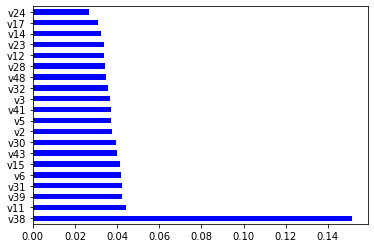

In [183]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)[0:20]
feature_scores.plot(kind = 'barh', color = 'blue')
plt.show()

In [191]:
imp_vars = list(feature_scores.index)
#separating the highly correlated features from imp_vars
final_vars = list(set(imp_vars) - set(features_to_remove))
print(len(final_vars))
final_vars

16


['v3',
 'v38',
 'v24',
 'v6',
 'v28',
 'v39',
 'v41',
 'v5',
 'v48',
 'v14',
 'v2',
 'v11',
 'v17',
 'v31',
 'v32',
 'v15']

## From running iterations for few other models, we noticed that without hyperparameter tuning, RandomForest was giving comparatively better results. Therefore, proceeding with RFClassifier for hyperparameter tuning and fine tuning the results.

In [149]:
from sklearn.model_selection import GridSearchCV

In [195]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7],
    'criterion' :['gini', 'entropy']
}
X_train_filtered = X_train[final_vars]
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_filtered, y_train)
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 500}

In [197]:
model = CV_rfc.best_estimator_
model.fit(X_train_filtered, y_train)
X_test_filtered = X_test[final_vars]
y_pred_new = model.predict(X_test_filtered)

In [198]:
print(confusion_matrix(y_test, y_pred_new))
print(classification_report(y_test, y_pred_new))

[[698  25]
 [184  26]]
              precision    recall  f1-score   support

         0.0       0.79      0.97      0.87       723
         1.0       0.51      0.12      0.20       210

    accuracy                           0.78       933
   macro avg       0.65      0.54      0.53       933
weighted avg       0.73      0.78      0.72       933



In [199]:
len(X_test_filtered.columns)

16

### With a combination of  {'criterion': 'entropy','max_depth': 4,'max_features': 'auto','n_estimators': 500}, we could increase the model performance with just 16 features. Did not perform feature selection for categorical columns separately as based on the analysis there were only two categorical columns.

### Finally going with this combination to get the final model and to generate the final dataset. As default = 1 indicates propensity towards default, we can focus on the recall more (imbalanced data containing less instance for default). We already have a comparatively decent precision to the data for predicting 1's which is 0.79. 
### We can consider for oversampling as we are focussing on predicting the probability of default which is the minority class.
### Retraining a model with imp features and adding hyperparameter class_weight as balanced as we have not performed over sampling

In [240]:
# We already have y_pred_new consisting of the predictions. 
# We need to concat it with the decision id to get the final output file

In [260]:
final_model = RandomForestClassifier(criterion= 'entropy',max_depth= 4,max_features= 'auto',n_estimators= 500
                                ,class_weight = 'balanced')
final_model.fit(X_train_filtered, y_train)
y_pred_final = final_model.predict(X_test_filtered)

In [261]:
print(confusion_matrix(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))

[[601 122]
 [119  91]]
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83       723
         1.0       0.43      0.43      0.43       210

    accuracy                           0.74       933
   macro avg       0.63      0.63      0.63       933
weighted avg       0.74      0.74      0.74       933



### Thus, we can see that just by taking in the top 16 variables, and the best parameters from grid search, additionally setting class_weight to 'balanced' is able to increase the recall and precision for the default class of people. 

In [273]:
X_test_output = X_test.copy()
X_test_output['index'] = X_test_output.index
X_test_output = X_test_output.reset_index()
X_test_output.drop('level_0', inplace = True, axis = 1)
X_test_output.head()

,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v19,v20,v21,v22,v23,v24,v25,v26,v28,v29,v30,v31,v32,v33,v35,v36,v37,v38,v39,v40,v41,v42,v43,v46,v47,v48,v49,v50,v18_1.0,v34_1.0,index
0,249355.560000,142.840000,0.00000,169.000000,36129.990000,0.000000,0.000000,4.00000,0.000000,10346.680000,4660.600000,0.00000,6.800000,16929.000000,5.00000,1.140000,0.000000,0.000000,0.000000,0.000000,835300.260000,0.000000,0.000000,0.000000,852889.120000,0.000000,249355.560000,1.640000,0.990000,26.680232,0.000000,1.000000,7.000000,1552.605949,19015.780000,0.00000,41979.610000,0.000000,8311.850000,2512.000000,0.00000,10596.000000,31.300275,0.000000,0,0,760
1,43139.470000,341.430000,0.00000,84.000000,57246.000000,0.000000,0.000000,1.00000,37984.644436,19377.630000,1395.600000,0.00000,12.000000,21907.000000,33.00000,1.390000,0.090991,0.000000,0.016163,0.000000,156572.990000,30348.252682,0.756061,0.000000,263383.770000,0.000000,44379.660000,0.440000,1.040000,0.000000,0.034122,0.000000,0.000000,245.927353,29108.140000,0.00000,30003.330000,0.076923,1479.320000,0.000000,0.00000,6461.880000,0.000000,0.022748,0,0,1483
2,296350.675537,23085.230345,0.13662,110.717578,145023.860121,0.250141,10.183941,1.59662,37984.644436,30183.039864,3996.034178,0.45662,9264.062006,28904.180011,12.10025,1.273544,0.090991,0.005276,0.016163,0.012774,653593.206162,30348.252682,0.756061,0.031658,803824.067037,0.060845,290845.662399,1.506815,6.508253,26.680232,0.034122,3.447653,5.582061,62941.560550,102774.947999,0.04832,102740.193921,0.076923,13478.924352,86.408089,0.01694,11398.884835,31.300275,0.022748,0,0,2480
3,69456.670000,29465.970000,1.00000,164.000000,143803.000000,1.000000,0.000000,2.00000,0.000000,10791.950000,2187.680000,0.00000,21964.000000,105183.000000,10.00000,0.990000,0.000000,0.000000,0.000000,0.000000,318307.910000,3500.000000,0.000000,0.000000,402532.240000,0.000000,68693.410000,0.900000,0.890000,26.680232,0.000000,0.000000,1.000000,3418.296572,143803.000000,0.00000,109795.690000,0.000000,2289.780000,0.000000,0.00000,14250.000000,31.300275,0.000000,0,0,3832
4,212988.940000,4067.950000,0.00000,163.000000,109165.660000,1.000000,0.000000,0.00000,0.000000,2028.650000,4966.980000,0.00000,2055.000000,27909.000000,0.00000,1.780000,0.000000,0.000000,0.000000,0.000000,908957.880000,0.000000,0.000000,0.000000,908957.880000,0.000000,212988.940000,1.850000,1.080000,0.000000,0.000000,0.000000,0.000000,1365.037661,55507.960000,0.00000,56239.910000,0.000000,9519.960000,0.000000,0.00000,5050.990000,0.000000,0.000000,0,0,2719


In [278]:
# X_test_output.count()

In [287]:
df_y_with_data = pd.concat([X_test_output, pd.DataFrame(y_pred_final)], axis = 1)
# df_y_with_data.count()

In [293]:
df_decision_new =  pd.DataFrame(df_decision.copy())
df_decision_new['index'] = df_decision_new.index
df_decision_new.head()

,decision_id,index
0,94dac214-e5d0-4758-b7ec-5a8e899b7f3e,0
1,bcab40cd-4aaa-43d2-ae82-7d9ba2ded0a9,1
2,c2f63ac4-e23c-40e7-8ef1-502c1d27df17,2
3,dc8c2882-5868-470c-8669-9a7e87782a40,3
4,e40e990a-e89c-43c5-b933-f2b096aa1d35,4


In [300]:
df_output = pd.merge(df_y_with_data, df_decision_new , how='inner', on='index')
df_output = df_output[['decision_id', 0]]
df_output.head()

,decision_id,0
0,0a599bfc-5850-4be5-b786-7bd26301be02,0.0
1,5db8e6ea-2976-40ad-926e-10c7a0c67234,0.0
2,c2c90c8c-de5d-42d9-8e5f-7a6d04e41210,0.0
3,c739bf4f-f56d-4c26-84fb-fadd97fcee25,0.0
4,e2f3de1e-28f0-4164-919e-1ab089d25c0e,0.0


In [301]:
df_output.columns = ['decision_id', 'probability_of_default']
df_output.head()

,decision_id,probability_of_default
0,0a599bfc-5850-4be5-b786-7bd26301be02,0.0
1,5db8e6ea-2976-40ad-926e-10c7a0c67234,0.0
2,c2c90c8c-de5d-42d9-8e5f-7a6d04e41210,0.0
3,c739bf4f-f56d-4c26-84fb-fadd97fcee25,0.0
4,e2f3de1e-28f0-4164-919e-1ab089d25c0e,0.0


In [302]:
df_output.to_csv('template.csv')

In [303]:
df_output.count()

decision_id               933
probability_of_default    933
dtype: int64